In [ ]:
import pandas as pd

# Load the dataset
insurance_data = pd.read_csv('insurance.csv')

# Display the first few rows of the dataset
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Checking for missing values in the dataset

missing_values = insurance_data.isnull().sum()
missing_values_percentage = (missing_values / len(insurance_data)) * 100

# Display the missing values and their percentages
missing_values_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_values_percentage})
missing_values_info

,Missing Values,Percentage (%)
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


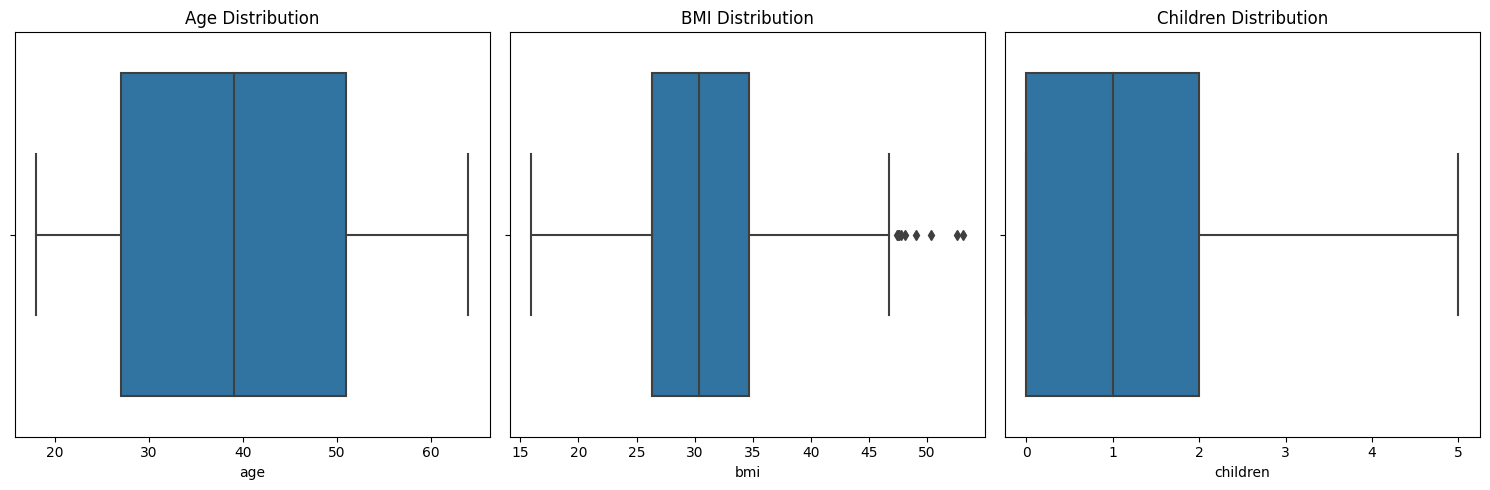

(               age          bmi     children       charges
 count  1338.000000  1338.000000  1338.000000   1338.000000
 mean     39.207025    30.663397     1.094918  13270.422265
 std      14.049960     6.098187     1.205493  12110.011237
 min      18.000000    15.960000     0.000000   1121.873900
 25%      27.000000    26.296250     0.000000   4740.287150
 50%      39.000000    30.400000     1.000000   9382.033000
 75%      51.000000    34.693750     2.000000  16639.912515
 max      64.000000    53.130000     5.000000  63770.428010,
 1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical summary of the dataset
statistical_summary = insurance_data.describe()

# Check for duplicate rows
duplicate_rows = insurance_data.duplicated().sum()

# Create box plots for numerical columns to visually inspect for outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(ax=axes[0], data=insurance_data, x='age')
axes[0].set_title('Age Distribution')
sns.boxplot(ax=axes[1], data=insurance_data, x='bmi')
axes[1].set_title('BMI Distribution')
sns.boxplot(ax=axes[2], data=insurance_data, x='children')
axes[2].set_title('Children Distribution')

plt.tight_layout()
plt.show()

(statistical_summary, duplicate_rows)


In [ ]:
duplicate_rows_df = insurance_data[insurance_data.duplicated(keep=False)]
duplicate_rows_df

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


# 1 Duplicate row found and will be removed

In [ ]:
# Calculate the IQR for BMI
Q1 = insurance_data['bmi'].quantile(0.25)
Q3 = insurance_data['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Counting the number of outliers
bmi_outliers = insurance_data[(insurance_data['bmi'] < lower_bound) | (insurance_data['bmi'] > upper_bound)]
num_bmi_outliers = bmi_outliers.shape[0]

# Displaying the number of outliers and the duplicate rows
num_bmi_outliers, duplicate_rows_df.style.set_table_attributes("style='display:inline'").set_caption('Duplicate Rows')


(9, <pandas.io.formats.style.Styler at 0x7be61579b940>)

# 9 Outliers found in BMI and we can proceed without treating the outliers as they are very few and should not affect our model.

In [ ]:
# Removing the duplicate row
insurance_data_cleaned = insurance_data.drop_duplicates()

# Verify if the duplicate has been removed
is_duplicate_removed = insurance_data_cleaned.duplicated().sum() == 0

In [ ]:
# Converting categorical variables into numerical formats using one-hot encoding
insurance_encoded = pd.get_dummies(insurance_data_cleaned, columns=['sex', 'smoker', 'region'])

# Displaying the first few rows of the encoded dataframe
insurance_encoded.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Performing EDA on the encoded dataset
# 1. Descriptive Statistics
descriptive_statistics = insurance_encoded.describe()

descriptive_statistics

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.495138,0.504862,0.795064,0.204936,0.242334,0.242334,0.272251,0.243082
std,14.044333,6.100468,1.205571,12110.359656,0.500163,0.500163,0.403806,0.403806,0.428655,0.428655,0.445285,0.429104
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9386.161300,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


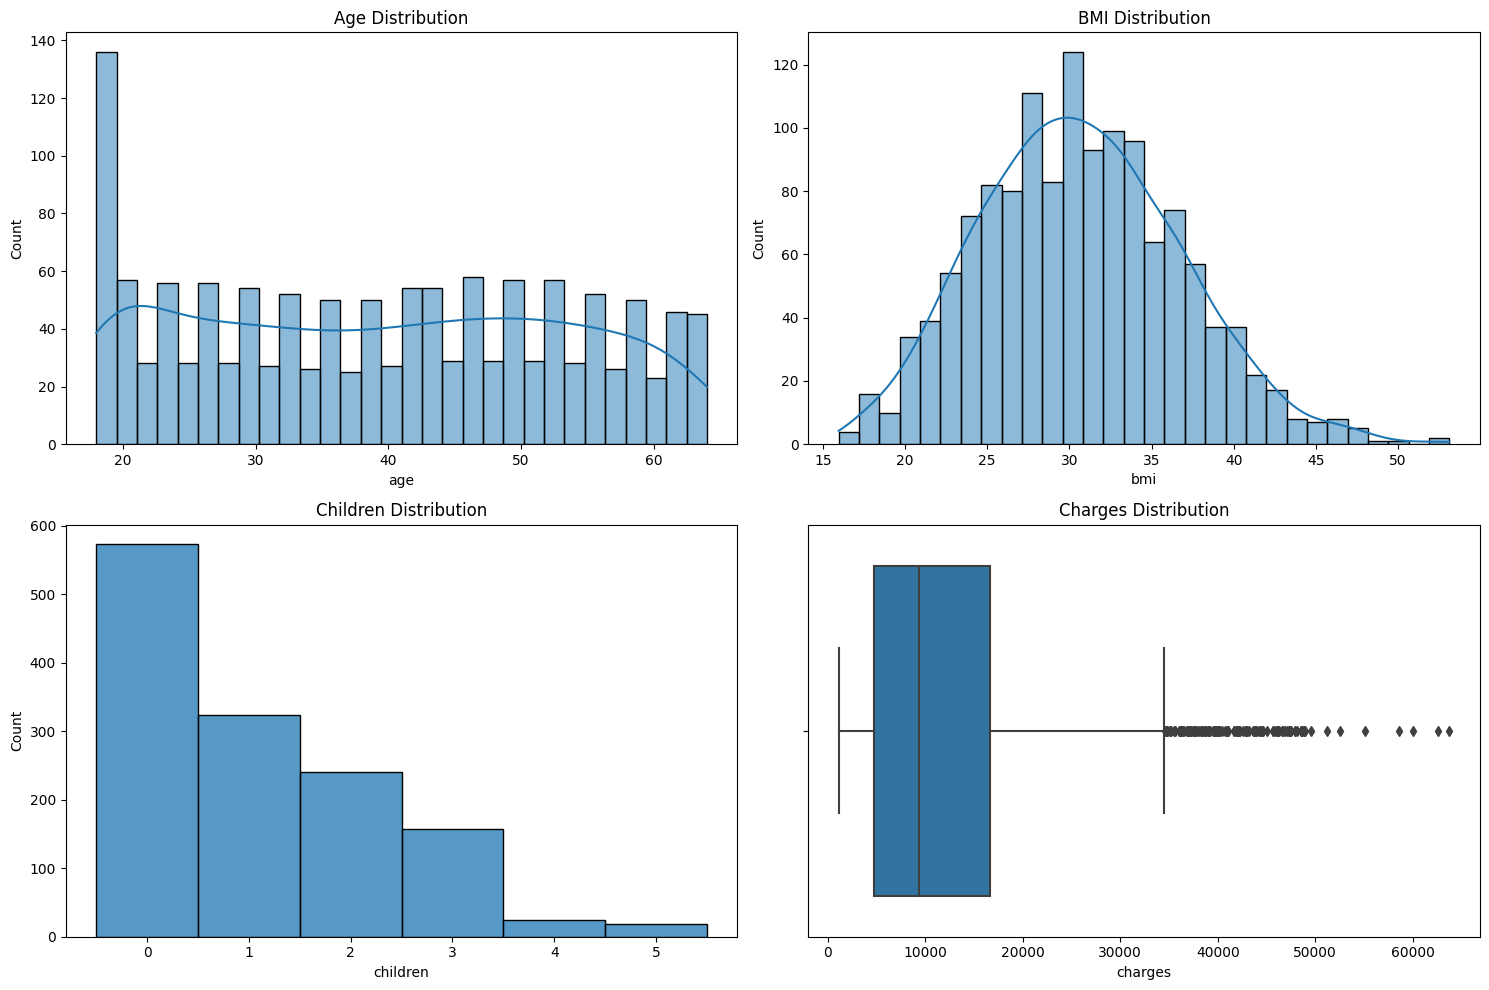

In [ ]:
# Distribution Analysis and Outlier Detection
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histograms for age, bmi, and children
sns.histplot(insurance_encoded['age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(insurance_encoded['bmi'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('BMI Distribution')

sns.histplot(insurance_encoded['children'], bins=6, kde=False, discrete=True, ax=axes[1, 0])
axes[1, 0].set_title('Children Distribution')

# Boxplot for charges to check for outliers
sns.boxplot(x=insurance_encoded['charges'], ax=axes[1, 1])
axes[1, 1].set_title('Charges Distribution')

plt.tight_layout()
plt.show()


 # Roughly bell-shaped BMI distribution, indicating a normal distribution
 # Other metrics are skewed and it is expected with the number of patients coming in hospital with different ages, no. of chilrden and the charges they incurr

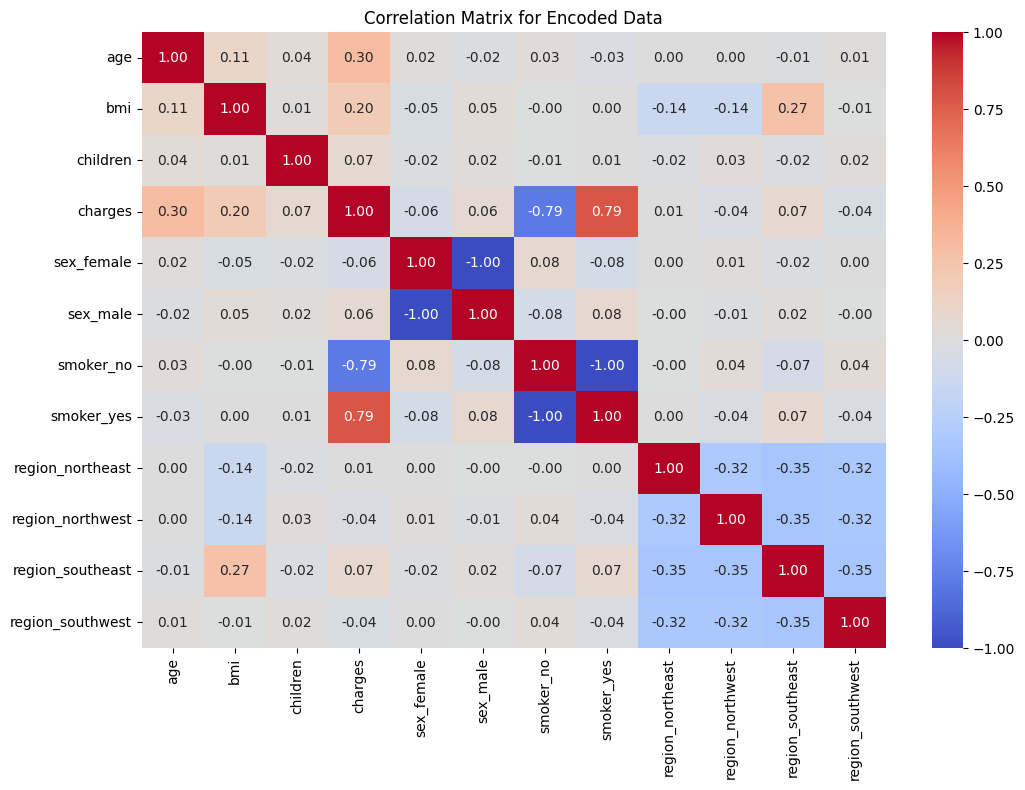

In [ ]:
# Correlation Analysis
correlation_matrix = insurance_encoded.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Encoded Data')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features and target variable
X = insurance_encoded.drop('charges', axis=1)  # Features
y = insurance_encoded['charges']               # Target variable

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the sizes of the training and testing sets
(X_train.shape, X_test.shape)

((1069, 11), (268, 11))

# 1069 samples with 11 features in the training set
# 268 samples with 11 features in the testing set.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Implementing the Linear Regression Model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Predicting on the testing set
y_pred = linear_reg_model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

(mae, mse, r2)

(4177.045561036321, 35478020.675235614, 0.8069287081198011)

# Mean Absolute Error (MAE): 4177.05
# Mean Squared Error (MSE): 35478020.68
# R-squared (Coefficient of Determination): 0.807
# shows 80.7% of the variance in insurance is explained by the independent varaibles

In [ ]:
# Splitting the dataset into features and target variable
X_encoded = insurance_encoded.drop('charges', axis=1)  # Features
y_encoded = insurance_encoded['charges']               # Target variable

# Splitting the dataset into training (80%) and testing (20%) sets
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Implementing the Linear Regression Model
linear_reg_model_encoded = LinearRegression()
linear_reg_model_encoded.fit(X_train_encoded, y_train_encoded)

# Predicting on the testing set
y_pred_encoded = linear_reg_model_encoded.predict(X_test_encoded)

# Evaluating the model
mae_encoded = mean_absolute_error(y_test_encoded, y_pred_encoded)
mse_encoded = mean_squared_error(y_test_encoded, y_pred_encoded)
r2_encoded = r2_score(y_test_encoded, y_pred_encoded)

(mae_encoded, mse_encoded, r2_encoded)

(4177.045561036321, 35478020.675235614, 0.8069287081198011)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import numpy as np

# Applying log transformation to the 'charges' column to normalize its distribution
y_log_transformed = np.log(insurance_encoded['charges'])

# Capping the BMI outliers at the 95th percentile
bmi_cap = insurance_encoded['bmi'].quantile(0.95)
X_capped = X_encoded.copy()
X_capped['bmi'] = X_encoded['bmi'].clip(upper=bmi_cap)

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_capped)

# Splitting the dataset into training and testing sets (with the transformed target variable)
X_train_scaled, X_test_scaled, y_train_log, y_test_log = train_test_split(X_scaled, y_log_transformed, test_size=0.2, random_state=42)

# Implementing Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train_log)

# Predicting on the testing set
y_pred_log = ridge_model.predict(X_test_scaled)

# Transforming the predictions back to the original scale
y_pred_original_scale = np.exp(y_pred_log)

# Re-evaluating the model
mae_ridge = mean_absolute_error(y_test_encoded, y_pred_original_scale)
mse_ridge = mean_squared_error(y_test_encoded, y_pred_original_scale)
r2_ridge = r2_score(y_test_encoded, y_pred_original_scale)

(mae_ridge, mse_ridge, r2_ridge)


(3777.7210944533467, 51648785.87101712, 0.7189274479700152)

# Mean Absolute Error (MAE): 3777.72
# Mean Squared Error (MSE): 51648785.87
# R-squared (Coefficient of Determination):0.719


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Implementing Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=42)

# Training the model using cross-validation to evaluate its performance
cv_scores = cross_val_score(random_forest_model, X_scaled, y_log_transformed, cv=5, scoring='r2')

# Average R-squared value from cross-validation
average_r2_rf = cv_scores.mean()

# Training the model on the entire training set and evaluating on the test set
random_forest_model.fit(X_train_scaled, y_train_log)
y_pred_rf_log = random_forest_model.predict(X_test_scaled)
y_pred_rf_original_scale = np.exp(y_pred_rf_log)

# Re-evaluating the model on the test set
mae_rf = mean_absolute_error(y_test_encoded, y_pred_rf_original_scale)
mse_rf = mean_squared_error(y_test_encoded, y_pred_rf_original_scale)
r2_rf = r2_score(y_test_encoded, y_pred_rf_original_scale)

(average_r2_rf, mae_rf, mse_rf, r2_rf)


(0.8105876287138916, 2062.051535411417, 19161558.297243584, 0.8957228519383291)

# Average R-squared (Cross-Validation): 0.810
# Mean Absolute Error (MAE) on Test Set: 2066.96
# Mean Squared Error (MSE) on Test Set: 19210380.02
# R-squared on Test Set: 0.895


